# Logistic Regression for Multiclass Classification

# Here we do Hand Written Digits Recognition

## 1. Import all usefull libraries

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Import Datasets 

In [26]:
from sklearn.datasets import load_digits  # it load hand written digits datasets 
digits = load_digits()

## 3. Have a view on our dataset

In [27]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

### we use 'data' and 'target' here to train our model

In [28]:
digits.data[0] # it gives color coding of 0

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## to view the image

<Figure size 432x288 with 0 Axes>

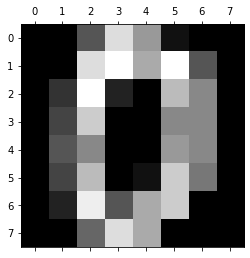

In [29]:
plt.gray()
plt.matshow(digits.images[0])

In [30]:
digits.target[0:5]  # it shows first five numbers in our datasets

array([0, 1, 2, 3, 4])

## 4. Train Test Splitting of our Datasets

In [31]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(digits.data , digits.target ,test_size=0.2)

## 5. Import our Model and fit data in it

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(x_train , y_train)

C:\Python3.9\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 6. Testing of our model

In [34]:
model.predict([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

array([0])

In [35]:
model.score(x_test , y_test)

0.9638888888888889

In [36]:
digits.target[67]

6

In [37]:
## now check what our model gives
model.predict([digits.data[67]])

array([6])

In [38]:
model.predict(digits.data[0:20])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 7. Lets Check where our model fails

#   To do so we use confusion_matrix

In [39]:
y_predicted = model.predict(x_test) # it give result sample of what our model gives
y_actual = y_test

### import Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_actual , y_predicted)
cm

array([[32,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 28,  0,  1,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 37,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 43]], dtype=int64)

## For better Visualization ,
## We use Seaborn library (it is similar to matplotlib)

Text(69.0, 0.5, 'Truth')

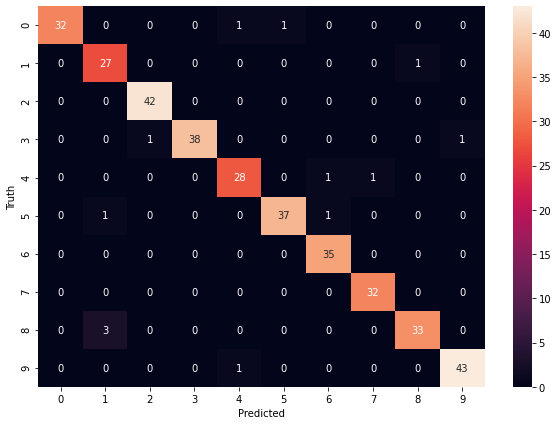

In [41]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')